# Part 1 - SOM

## Importing Librairies

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

2023-04-11 17:38:35.146632: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 17:38:35.652102: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 17:38:35.654290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 17:38:37.164247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Importing dataset

In [2]:
dataset = pd.read_csv("Dataset/creditcard.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling

In [12]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training

In [17]:
som = MiniSom(x=20, y=20, input_len= 30, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

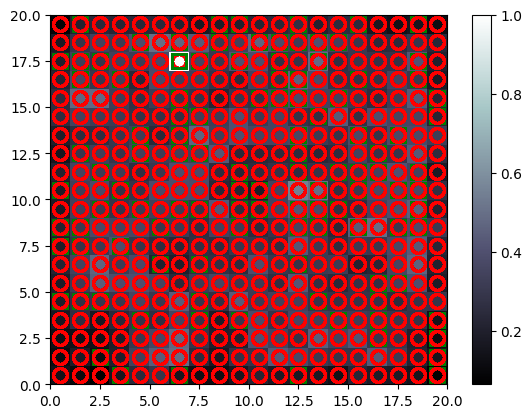

In [18]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [32]:
mappings = som.win_map(X)
frauds = mappings[(6,17)]
frauds = sc.inverse_transform(frauds)

## Printing the Frauds

In [33]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
11080
11131
11629
12597
13126
13323
14073
14152
17044
17520
17789
17838
18064
18088
18359
18399
18675
18690
18709
19762
20011
20332
20451
20823
20931
21046
21177
21377
21419
21570
21662
21860
22690
22731
23665
23698
23903
24120
24144
24342
24532
24735
24955
25198
25231
25254
26217
26523
26556
26585
26833
26863
26899
26931
26960
27163
27186
27219
27252
27524
28143
28625
28658
28692
28726
28754
34687
35866
35899
35906
35926
35942
35953
36170
40892
41116
41138
41147
41164
41170
41181
41194
41203
41204
41227
41233
41237
41243
41273
41285
41305
41308
41313
41353
41397
41413
41501
41505
41508
41607
41851
41864
41870
42985
42988
52997
55278
55311
55614
55618
56624
56650
57163
62341
64093
74895
75581
75706
75851
75978
76575
76826
77627
84204
84204
84204
84204
84694
85285
85285
85285
85285
93742
93823
93824
93834
93853
93853
93853
93853
93856
93860
93860
93860
93860
93879
93879
93879
93879
93888
93896
93903
93919
93965
94141
94362
94362
94362
94362
94364
95559
95628
97121
972

# Part 2 - Going from Unsupervised to Supervised Deep Learning

## Create Matrix of Features

In [35]:
customers = dataset.iloc[:, :].values

## Create Dependent Variable

In [36]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

# Part 3 - ANN

## Feature Scaling

In [38]:
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

In [40]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [41]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [42]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10


2023-04-11 17:39:34.345907: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35316068 exceeds 10% of free system memory.


184941/284807 [==================>...........] - ETA: 3:08 - loss: 0.0135 - accuracy: 0.9978

## Predicting test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

print(y_pred)